# Extreme Value Anlaysis using daily Precipitation data from Cal-Adapt API with R package eva

In [7]:
# A 'magic' command to display plots inline
%matplotlib inline

# Import all python modules. You need to run this cell for the other cells to work.
import requests 
import numpy as np
import pandas as pd
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
from scipy.stats.distributions import genextreme
from scipy.stats.distributions import genpareto

----
# Download data
----

Daily data is stored as a multiband raster, e.g. observed daily timeseries (1950 -2013) has 23376 bands with each band corresponding to one day, starting from 1950-01-01. Units for the observed data are mm and projected data are in kg/m2/s.

The code in the next cell contains a bunch of functions to:
    - fetch daily data given a slug and params
    - convert units to inches
    - return a new Pandas dataframe that contains all the data

In [8]:
# Cal-Adapt API
api = 'http://api.cal-adapt.org/api'

# Request header
headers = {'ContentType': 'json'}

# Params
point = 'POINT(-121.4687 38.5938)'
params = {'g': point}

def mm_to_inches(val):
    return val * 0.0393701

def kgm2s_to_inches(val):
    return  (val * 86400) * 0.0393701

In [9]:
def process_daily_data(slug, params):
    # Make request
    url = api + '/series/' + slug + '/rasters/'
    response = requests.get(url, params=params)
    
    # Get data
    if response.ok:
        print('Processing:', slug)
        json = response.json()
        data = json['results'][0]

        # Multiband raster data is returned by the API as a 3D array having a shape like (233376, 1, 1)
        # Flatten the 3D array into a 1D array
        values_arr = np.array(data['image'])
        values_arr = values_arr.flatten()

        # Get total number of values -> number of days
        length = len(values_arr)

        # Get start date of timeseries
        start_date = datetime.strptime(data['event'], '%Y-%m-%d')

        # Create new pandas dataframe and map each value in list to a date index
        df = pd.DataFrame(
            values_arr,
            index=pd.date_range(start_date, freq='1D', periods=length),
            columns=['value'],
        )

        # Convert units to Fahrenheit
        units = data['units']
        if units == 'mm':
            df.value = df.value.apply(lambda x: mm_to_inches(x))
        elif units == 'kg/m2/s':
            df.value = df.value.apply(lambda x: kgm2s_to_inches(x))
        else:
            pass
            
        # Add slug as a column
        df['series'] = slug.split('_')[2]
        
        # Add wateryear as a column
        df['year'] = df.index.year
        df['month'] = df.index.month
        df['wateryear'] = np.where(df['month'] > 9, df['year'] + 1, df['year'])

    else:
        print('Failed to download:', slug)
            
    # Combine all the dataframes into one and return
    return df

In [10]:
# Download observed daily timeseries
def get_observed():
    # Create slug
    slug = 'pr_day_livneh'
    df = process_daily_data(slug, params)
    return df

df = get_observed()
df

Processing: pr_day_livneh


,value,series,year,month,wateryear
1950-01-01,0.021879,livneh,1950,1,1950
1950-01-02,0.038984,livneh,1950,1,1950
1950-01-03,0.000000,livneh,1950,1,1950
1950-01-04,0.000000,livneh,1950,1,1950
1950-01-05,0.000000,livneh,1950,1,1950
1950-01-06,0.000000,livneh,1950,1,1950
1950-01-07,0.278853,livneh,1950,1,1950
1950-01-08,0.227935,livneh,1950,1,1950
1950-01-09,0.043757,livneh,1950,1,1950
1950-01-10,0.640446,livneh,1950,1,1950


----
# Select Threshold
----

Using a baseline period of wateryears 1961 - 1990, calculate the Annual Maximum Series (AMS) Precipitation for each year. The minimum value from AMS is selected as the threshold.

Threshold value =  0.6 inches


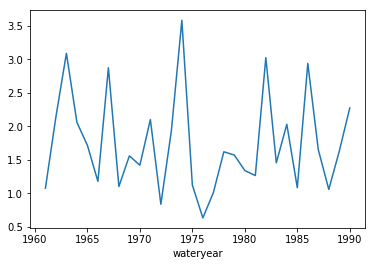

In [15]:
# Filter data by baseline time period
baselineDF = df.loc[(df['wateryear'] >= 1961) & (df['wateryear'] <= 1990) & (df['series'] == 'livneh')]
baselineDF_max = baselineDF.groupby('wateryear').value.max()
baselineDF_max.plot()

# Create an array of maximum values by water year
AMS = baselineDF_max.values

# Set threshold
threshold = np.min(AMS)
print('Threshold value = ', round(threshold, 1), 'inches')

----
# Extreme Value Analysis
----

Approach 2: Peak Over Threshold/Parital Duration Series (PDS)

In [17]:
# Create an array of all daily values above threshold
PDS = baselineDF['value'].values
print('Number of observations =', len(PDS))
print('Number of exceedances =', (PDS > threshold).sum())

Number of observations = 10957
Number of exceedances = 257


Code from R package eva [gpd.R](https://github.com/geekman1/eva_package/blob/master/R/gpd.R)

In [98]:
#' The Generalized Pareto Distribution (GPD)
#'
#' Density, distribution function, quantile function and random number generation for the Generalized Pareto
#' distribution with location, scale, and shape parameters.
#' @name gpd
#' @rdname gpd
#' @param x Vector of observations.
#' @param q Vector of quantiles.
#' @param p Vector of probabilities.
#' @param n Number of observations.
#' @param loc,scale,shape Location, scale, and shape parameters. Can be vectors, but
#' the lengths must be appropriate.
#' @param log.d Logical; if TRUE, the log density is returned.
#' @param lower.tail Logical; if TRUE (default), probabilities are P[X <= x], otherwise, P[X > x].
#' @param log.p Logical; if TRUE, probabilities p are given as log(p).
#' @examples
#' dgpd(2:4, 1, 0.5, 0.01)
#' dgpd(2, -2:1, 0.5, 0.01)
#' pgpd(2:4, 1, 0.5, 0.01)
#' qgpd(seq(0.9, 0.6, -0.1), 2, 0.5, 0.01)
#' rgpd(6, 1, 0.5, 0.01)
#'
#' ## Generate sample with linear trend in location parameter
#' rgpd(6, 1:6, 0.5, 0.01)
#'
#' ## Generate sample with linear trend in location and scale parameter
#' rgpd(6, 1:6, seq(0.5, 3, 0.5), 0.01)
#'
#' p <- (1:9)/10
#' pgpd(qgpd(p, 1, 2, 0.8), 1, 2, 0.8)
#' ## [1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
#'
#' ## Incorrect syntax (parameter vectors are of different lengths other than 1)
#' # rgpd(1, 1:8, 1:5, 0)
#'
#' ## Also incorrect syntax
#' # rgpd(10, 1:8, 1, 0.01)
#'
#' @details The Generalized Pareto distribution function is given (Pickands, 1975)
#' by \deqn{H(y) = 1 - \Big[1 + \frac{\xi (y - \mu)}{\sigma}\Big]^{-1/\xi}} defined
#' on \eqn{\{y : y > 0, (1 + \xi (y - \mu) / \sigma) > 0 \}}, with location \eqn{\mu},
#' scale \eqn{\sigma > 0}, and shape parameter \eqn{\xi}.
#'
#' @references Pickands III, J. (1975). Statistical inference using extreme order statistics. Annals of Statistics, 119-131.


#' @rdname gpd
#' @export
# rgpd <- function(n, loc = 0, scale = 1, shape = 0) {
#   if(min(scale) <= 0)
#     stop("Invalid scale")
#   cond1 <- (n > 1) &
#     (((length(loc) != n) & (length(loc) != 1)) |
#     ((length(scale) != n) & (length(scale) != 1)) |
#     ((length(shape) != n) & (length(shape) != 1)))
#   cond2 <- (n == 1) &
#     (length(unique(c(n, length(loc), length(scale), length(shape)))) > 2)
#   if(cond1 | cond2)
#     stop("Invalid parameter length!")
#   qgpd(runif(n), loc, scale, shape)
# }


def rgpd(n, loc = 0, scale = 1, shape = 0):
    if (np.min(scale) <= 0):
        print("Invalid scale")
    cond1 = (n > 1) and (((len(loc) != n) and (len(loc) != 1)) or ((len(scale) != n) and (len(scale) != 1)) or ((len(shape) != n) and (len(shape) != 1)))
    cond2 = (n == 1) and (len(unique(c(n, len(loc), len(scale), len(shape)))) > 2)
    if (cond1 | cond2):
        print("Invalid parameter length!")
    qgpd(np.random.random((n,)), loc, scale, shape)
    
#' @rdname gpd
#' @export
# qgpd <- function(p, loc = 0, scale = 1, shape = 0, lower.tail = TRUE, log.p = FALSE) {
#   if(log.p)
#     p <- exp(p)
#   if((min(p, na.rm = TRUE) <= 0) || (max(p, na.rm = TRUE) >= 1))
#     stop("`p' must contain probabilities in (0,1)")
#   if(min(scale) <= 0)
#     stop("Invalid scale")
#   cond1 <- (length(p) > 1) &
#     (((length(loc) != length(p)) & (length(loc) != 1)) |
#     ((length(scale) != length(p)) & (length(scale) != 1)) |
#     ((length(shape) != length(p)) & (length(shape) != 1)))
#   cond2 <- (length(p) == 1) &
#     (length(unique(c(length(p), length(loc), length(scale), length(shape)))) > 2)
#   if(cond1 | cond2)
#     stop("Invalid parameter length!")
#   if(lower.tail)
#     p <- 1 - p
#   if(length(shape) == 1)
#     shape <- rep(shape, max(length(p), length(loc), length(scale)))
#   ifelse(shape == 0, loc - scale * log(p), loc + scale * expm1(-shape * log(p)) / shape)
# }

def qgpd(p, loc = 0, scale = 1, shape = 0, lower_tail = True, log_p = False):
    if (log_p):
        p = exp(p)
    # na.rm refers to nan values. Use np.nanmin to ignore nan values
    if ((np.nanmin(p) <= 0) or (np.nanmax(p) >= 1)):
        print("`p' must contain probabilities in (0,1)")
    if (np.min(scale) <= 0):
        print("Invalid scale")
    cond1 = (len(p) > 1) and (((len(loc) != len(p)) & (len(loc) != 1)) or ((len(scale) != len(p)) & (len(scale) != 1)) or ((len(shape) != len(p)) and (len(shape) != 1)))
    cond2 = (len(p) == 1) and (len(np.unique(c(len(p), len(loc), len(scale), len(shape)))) > 2)
    if (lower_tail):
        p = 1 - p
    if (len(shape) == 1):
        d = np.max([len(p), len(loc), len(scale)])
        shape = np.repeat(shape, d)
    if (np.sum(shape) == 0):
        return loc - scale * np.math.log(p)
    else:
        print('reached here')
        print(type(p))
        logp = np.math.log(p)
        expm1p = np.math.expm1(-shape * logp)
        return loc + scale * expm1p / shape

In [99]:
rgpd(5, loc = np.array([0]), scale = np.array([1]), shape = np.array([-0.1]))

reached here
<class 'numpy.ndarray'>


TypeError: only size-1 arrays can be converted to Python scalars

In [65]:
np.math.expm1(3)

19.085536923187668

In [62]:
np.array([2]).repeat(2)

array([2, 2])